# Simple pendulum using Lagrange's equation
|
Defines a LagrangianPendulum class that is used to generate double pendulum plots from solving Lagrange's equations.

* Last revised 27-Apr-2019 by Richard Mueller (mueller.415@osu.edu).

## Euler-Lagrange equation

For a double pendulum, the kinetic energy is:

$\begin{align}
  T = \frac12 m_1 L_1^2 \dot\phi_1^2 + \frac12 m_2 (L_2^2 \dot\phi_2^2 + L_1^2 \dot\phi_1^2 + 2L_1L_2\dot\phi_1 \dot\phi_2\cos(\phi_1-\phi_2))
\end{align}$

The potential energy:

$\begin{align}
  U = - m_1gL_1(1 - \cos\phi_1) - m_2g(L_1(1 - \cos\phi_1)+ L_2(1 - \cos\phi_2))
\end{align}$

The Lagrangian with generalized coordinates $\phi_i$ is then

$\begin{align}
  \mathcal{L} = T - U = \frac12 (m_1 L_1^2 \dot\phi_1^2 +  m_2(L_2^2 \dot\phi_2^2 + L_1^2 \dot\phi_1^2 + 2L_1L_2\dot\phi_1 \dot\phi_2\cos(\phi_1-\phi_2))) + m_1gL_1(1 - \cos\phi_1) + m_2g(L_1(1 - \cos\phi_1)+ L_2(1 - \cos\phi_2))
\end{align}$

The Euler-Lagrange equation is

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_i} = \frac{\partial\mathcal L}{\partial\phi_i}
\end{align}$
 
 
Taking these derivatives,

$\begin{align}
 \frac{\partial\mathcal L}{\partial\phi_1} = m_1gL_1\sin\phi_1 + m_2gL_2\sin\phi_2 - m_2L_1L_2\sin(\phi_1-\phi_2)
\end{align}$

$\begin{align}
 \frac{\partial\mathcal L}{\partial\phi_1} = m_2gL_2\sin\phi_2 + m_2L_1L_2\sin(\phi_1-\phi_2)
\end{align}$

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_1} = \ddot\phi_1L_1^2(m_1+m_2) + m_2L_1L_2(\ddot\phi_2\cos(\phi_1-\phi_2) + \dot\phi_2^2\sin(\phi_1-\phi_2)) - \dot\phi_1 \dot\phi_2 \sin(\phi_1 - \phi_2))
\end{align}$

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_2} = m_2\ddot\phi_2L_2^2 + m_2L_1L_2(\ddot\phi_1\cos(\phi_1-\phi_2) + (\dot\phi_1^2 - \dot\phi_1\dot\phi_2)\sin(\phi_1-\phi_2))
\end{align}$


Solving, we find:


$\begin{align}
 \ddot\phi_1 = \frac{1}{m_1 + m_2\sin^2(\phi_1-\phi_2)} (-\sin(\phi_1)(m_1+m_2) + m_2 g \sin(\phi_2) \cos(\phi_1-\phi_2) - m_2 \sin(\phi_1-\phi_2) (L_1 \dot\phi_1^2 \cos(\phi_1-\phi_2) + L_2 \dot\phi_2^2))
\end{align}$

$\begin{align}
 \ddot\phi_2 = \frac{1}{m_1 + m_2\sin^2(\phi_1-\phi_2)} (g(m_1+m_2)(\cos(\phi_1-\phi_2)\sin(\phi_1) - \sin(\phi_2)) + L_1 \dot\phi_1^2 \sin(\phi_1-\phi_2)(m_1 + m_2) + m_2L_2\dot\phi_2^2 \sin(\phi_1-\phi_2)\cos(\phi_1-\phi_2))
\end{align}$

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 10
plt.rcParams.update({'font.size': font_size})

## Pendulum class and utility functions

In [3]:
class LagrangianPendulum():
    """
    Pendulum class implements the parameters and Lagranges's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    L : float
        length of the pendulum
    g : float
        gravitational acceleration at the earth's surface
    m: float
        mass of a pendulum

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1., L2=1., 
                 m1=1., m2=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.m1 = m1
        self.m2 = m2
        self.g = g
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with 
            y[0] = phi_1(t) and y[1] = dphi_1/dt
            y[2] = phi_2(t) and y[3] = dphi_2/dt
            
        Returns
        -------
        
        """
        p1, p1d, p2, p2d = y
        
        c, s = np.cos(p1-p2), np.sin(p1-p2)
        denom = (self.m1 + self.m2 * s**2)
        
        p1dd = ( - np.sin(p1)*self.g*(self.m1+self.m2) \
                 + np.sin(p2)*self.g*self.m2*c \
                 - s*self.m2*(self.L1*p1d**2 * c + self.L2*p2d**2) \
                ) / (self.L1*denom)
        
        p2dd = ( self.g*(self.m2 + self.m1)*(c*np.sin(p1) - np.sin(p2)) \
                 + p1d**2 * s*self.L1*(self.m2 + self.m1) \
                 + p2d**2 * s*c*self.L2*self.m2 \
                ) / (self.L2*denom)
                
        phi1_dot = p1d
        phi2_dot = p2d
               
        return phi1_dot, p1dd, phi2_dot, p2dd
    
    def solve_ode(self, t_pts, p1_0, p1d_0, p2_0, p2d_0,
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [p1_0, p1d_0, p2_0, p2d_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        p1, p1d, p2, p2d = solution.y
        
        
        return p1, p1d, p2, p2d

In [4]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [5]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make a double pendulum plot

In [6]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
g = 1.
m1 = 1.
m2 = 1.

# Instantiate a pendulum 
p1 = LagrangianPendulum(L1=L1,L2=L2,m1=m1,m2=m2, g=g)


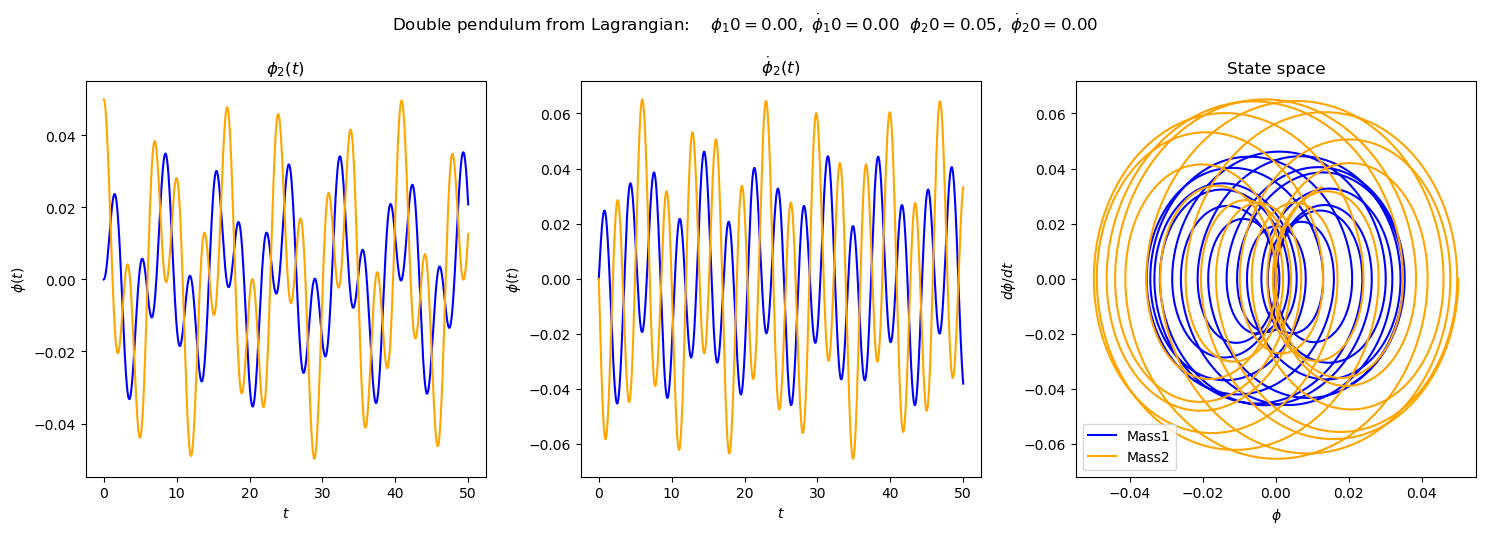

In [7]:
# both pendulums, different initial conditions
phi1_0 = 0.
phi2_0 = 0.05
phi1_dot_0 = 0.
phi2_dot_0 = 0.
phi1, phi1_dot, phi2, phi2_dot = p1.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)


# start the plot!
fig_1 = plt.figure(figsize=(15,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf'  $\phi_{(10)} = {phi1_0:.2f},$' + \
                rf' $\dot\phi_{10} = {phi1_dot_0:.2f}$' + \
                rf'  $\phi_{20} = {phi2_0:.2f},$' + \
                rf' $\dot\phi_{20} = {phi2_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig_1.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig_1.add_subplot(1,3,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\phi_1(t)$', 
            ax=ax_a)    
                              
# second plot: phi_dot plot 
ax_b = fig_1.add_subplot(1,3,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1_dot[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\dot\phi_1(t)$', 
            ax=ax_b)    

# third plot: state space plot from t=30 to t=50   
ax_c = fig_1.add_subplot(1,3,3)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi1[start : stop], phi1_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label='Mass1', 
            title='State space', 
            ax=ax_c) 

##### Start plotting the second mass
# first plot: phi plot 
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='orange',
            label=None, 
            title=r'$\phi_2(t)$', 
            ax=ax_a)    
                              
# second plot: phi_dot plot 
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi2_dot[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='orange',
            label=None, 
            title=r'$\dot\phi_2(t)$', 
            ax=ax_b)    

# third plot: state space plot from t=30 to t=50   
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi2[start : stop], phi2_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='orange',
            label='Mass2', 
            title='State space', 
            ax=ax_c) 

# Adding one legend should be enough
ax_c.legend()


fig_1.tight_layout()
fig_1.savefig('TwoPendulums.png', bbox_inches='tight')  

## Chaos

Here, we plot $\Delta \phi$ and show that for angles outside the small angle approximation, $\Delta \phi$ increases exponentially because its semilog plot is linear.

In [8]:
# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
g = 1.
m1 = 1.
m2 = 1.

# Instantiate a pendulum 
c1 = LagrangianPendulum(L1=L1,L2=L2,m1=m1,m2=m2, g=g)
c2 = LagrangianPendulum(L1=L1,L2=L2,m1=m1,m2=m2, g=g)

# One plot for each pendulum for two slightly 
# different initial conditions
phi1_10 = 0.
phi2_10 = np.pi / 4.
phi1_dot_10 = 0.
phi2_dot_10 = 0.
phi1_1, phi1_dot_1, phi2_1, phi2_dot_1 = c1.solve_ode(t_pts, phi1_10, phi1_dot_10, phi2_10, phi2_dot_10)

phi1_20 = 0.
phi2_20 = np.pi / 2. + .01
phi1_dot_20 = 0.
phi2_dot_20 = 0.
phi1_2, phi1_dot_2, phi2_2, phi2_dot_2 = c2.solve_ode(t_pts, phi1_20, phi1_dot_20, phi2_20, phi2_dot_20)

# Calculate the absolute value of \phi_2 - \phi_1
D_phi_1 = np.abs(phi1_1 - phi1_2)
D_phi_2 = np.abs(phi2_1 - phi2_2)

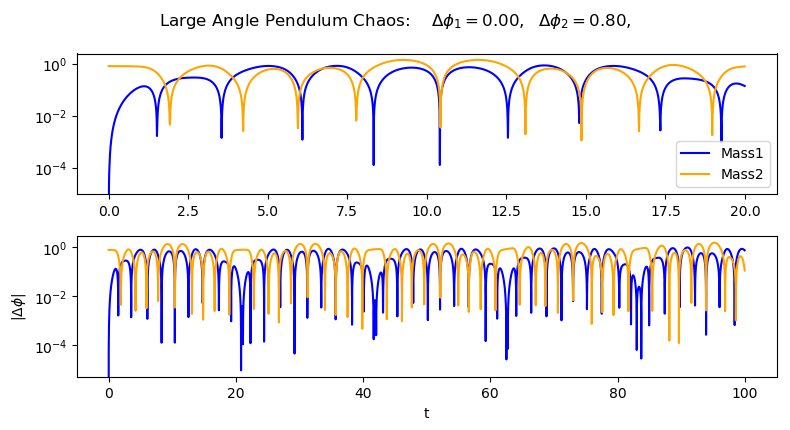

In [9]:
# start the plot!
fig_2 = plt.figure(figsize=(8,4))
overall_title = 'Large Angle Pendulum Chaos:  ' + \
                rf'  $\Delta\phi_1 = {D_phi_1[0]:.2f},$' + \
                rf'  $\Delta\phi_2 = {D_phi_2[0]:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig_2.suptitle(overall_title, va='baseline')



    
# two plot: plot from t=0 to t=8 and another from t=0 to t=100 
ax_a = fig_2.add_subplot(2,1,1)                  
start, stop = start_stop_indices(t_pts, 0., 20.)
ax_a.semilogy(t_pts[start : stop], D_phi_1[start : stop], 
            color='blue', label='Mass1') 
ax_a.semilogy(t_pts[start : stop], D_phi_2[start : stop], 
            color='orange', label='Mass2') 
ax_a.legend()

ax_b = fig_2.add_subplot(2,1,2)                  
start, stop = start_stop_indices(t_pts, 0., 100.)
plot_y_vs_x(t_pts[start : stop], D_phi_1[start : stop], 
            color='blue', label=None, semilogy=True)    
plot_y_vs_x(t_pts[start : stop], D_phi_2[start : stop], 
            color='orange', label=None, semilogy=True)   
ax_b.set_xlabel('t')
ax_b.set_ylabel(r'$|\Delta\phi|$')



                              
fig_2.tight_layout()
# always bbox_inches='tight' for best results.  Further adjustments also.
fig_2.savefig('Delta_phi.png', bbox_inches='tight')  

## Animation

Animating the double pendulum and graphing its state & phase state over time.

In [10]:
%matplotlib notebook

from matplotlib import animation, rc
from IPython.display import HTML

In [11]:
class AnimationPendulumPlot():
    """
    AnimationPlot class uses matplotlib.animation.FuncAnimation to animate
    the dynamics of a double pendulum.This includes a simple time dependence
    graph, a state space graph, and a physical model.
     

    Methods
    -------
    
    t_pts_init
    
    add_pendulum
    
    plot_init
    
    animate_Pendulum
    
    start_Animation
    """
    
    def __init__(self, x1_vs_y1 = True, x2_vs_y2=True,
                 physical_orb = True):
        self.mass1 = 1.
                          
    def t_pts_init(self, t_start=0., t_end=100., delta_t=0.01): 
        """Create the array of time points for the full iteration"""
        self.t_start = t_start
        self.t_end = t_end
        self.delta_t = delta_t
        self.t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

    def add_pendulum(self, pend, phi1_0, phi1_dot_0,
                                 phi2_0, phi2_dot_0):
        """Add a double pendulum to be plotted as a class instance of Lagrangian
           Pendulum along with initial conditions.  So it knows all of the 
           parameters as well through the Orbit class.
        """
        self.pend = pend
        self.phi1, self.phi1_dot, self.phi2, self.phi2_dot = pend.solve_ode(self.t_pts, 
                                                  phi1_0, phi1_dot_0,
                                                  phi2_0, phi2_dot_0)
        self.x1 = self.pend.L1 * np.sin(self.phi1)
        self.y1 = -self.pend.L1 * np.cos(self.phi1)
        self.x2 = self.x1 + self.pend.L1 * np.sin(self.phi2)
        self.y2 = self.y1 - self.pend.L1 * np.cos(self.phi2)
        
    def plot_init(self):
        """
        Sets up the plot, paths (lines), and points (pts) to be animated
        """
        ###### Add a figure
        self.fig_3 = plt.figure(figsize=(9, 3.3), num='Orbit animation')
        
############## Add & customize Plot 1
        self.ax_1 = self.fig_3.add_subplot(1,3,1)        
        self.ax_1.set_xlabel(r'$t$')
        self.ax_1.set_ylabel(r'$\phi(t)$')
        
        # Add empty lines. Will mark paths
        self.line1, = self.ax_1.plot([], [], '-', lw=1, color='orange')
        self.line2, = self.ax_1.plot([], [], '-', lw=1, color='blue')
        # Add points. Will mark current position of each mass
        self.pt1, = self.ax_1.plot([], [], 'o', lw=2, color='orange')
        self.pt2, = self.ax_1.plot([], [], 'o', lw=2, color='blue')
        
############## Add & customize Plot 2
        self.ax_2 = self.fig_3.add_subplot(1,3,2)
        # Limit axis to full pendulum length
        self.ax_2.set_xlim(-2.2, 2.2)
        self.ax_2.set_ylim(-2.2, 2.2)

        # Add points. Will mark current position of each mass
        self.line3, = self.ax_2.plot([], [], 'o-', lw=3)
        
############## Add & customize Plot 3
        self.ax_3 = self.fig_3.add_subplot(1,3,3)
        self.ax_3.set_xlabel(r'$\phi$')
        self.ax_3.set_ylabel(r'$\dot\phi$')
        
        # Add empty lines. Will mark paths
        self.line4, = self.ax_3.plot([], [], '-', lw=1, color='orange')
        self.line5, = self.ax_3.plot([], [], '-', lw=1, color='blue')
        # Add points. Will mark current position of each mass
        self.pt4, = self.ax_3.plot([], [], 'o', lw=2, color='orange')
        self.pt5, = self.ax_3.plot([], [], 'o', lw=2, color='blue')
    
        self.fig_3.tight_layout()
        
    def animate_Pendulum(self, i): 
        """
        Function is fed into FuncAnimation to draw lines and points
        """
        # Current stop drawing index
        cInd = self.t_str + self.skip*i
        
        ###### Fill paths and current points of masses
########### Plot 1 Stuff
        # Set axis limits for user time interval
        self.ax_1.set_xlim(1.2*np.min(self.tI), 1.2*np.max(self.tF))
        self.ax_1.set_ylim(1.2*np.min(self.phi2), 1.2*np.max(self.phi2))
        # Draw lines/points
        self.line1.set_data(self.t_pts[self.t_str:cInd:self.skip], 
                            self.phi1[self.t_str:cInd:self.skip])
        self.pt1.set_data(self.t_pts[cInd-self.skip], 
                          self.phi1[cInd-self.skip])
        self.line2.set_data(self.t_pts[self.t_str:cInd:self.skip], 
                            self.phi2[self.t_str:cInd:self.skip])
        self.pt2.set_data(self.t_pts[cInd-self.skip],
                          self.phi2[cInd-self.skip])
        
########### Plot 2 Stuff
        # Plot origin & masses w/line connecting them
        thisx = [0., self.x1[cInd-self.skip], 
                     self.x2[cInd-self.skip]]
        thisy = [0., self.y1[cInd-self.skip], 
                     self.y2[cInd-self.skip]]
        # Draw lines/points
        self.line3.set_data(thisx, thisy)
        
########### Plot 3 Stuff
        # Set axis limits for user time interval
        self.ax_3.set_xlim(2*np.min(self.phi2), 2*np.max(self.phi2))
        self.ax_3.set_ylim(2*np.min(self.phi1_dot), 2*np.max(self.phi1_dot))
        # Draw lines/points
        self.line4.set_data(self.phi1[self.t_str:cInd:skip], 
                            self.phi1_dot[self.t_str:cInd:skip])
        self.pt4.set_data(self.phi1[cInd-skip], self.phi1_dot[cInd-skip])
        
        self.line5.set_data(self.phi2[self.t_str:cInd:skip], 
                            self.phi2_dot[self.t_str:cInd:skip])
        self.pt5.set_data(self.phi2[cInd-skip], self.phi2_dot[cInd-skip])
    
        return self.line1, self.pt1, self.line2, self.pt2, \
               self.line3, \
               self.line4, self.pt4, self.line5, self.pt5

    def start_Animation(self, plot_start, plot_end, skip_int,
                              interval):
        """
        Starts the animation when called with FuncAnimation
        """
        self.tI = plot_start
        self.tF = plot_end
        self.skip = skip_int
        self.interval = interval
        
        # Start index for plotting
        self.t_str = np.where(self.t_pts == self.tI)[0][0]
        
        # Number of frames needed
        self.num_frames = int((self.tF - self.tI) / self.delta_t / self.skip)
        
        ###### Plot this mofo
        self.fig_3.show()
        self.anim = animation.FuncAnimation(self.fig_3, 
                                            self.animate_Pendulum,
                                            frames=self.num_frames,
                                            interval=self.interval, blit=False,
                                            repeat=False, save_count=0)
        

In [12]:
# Create a pendulum animation instance. 
pendulum_anim = AnimationPendulumPlot()

# Common plotting time (generate the full time here then use slices below)
t_start = 0.
t_end = 100.
delta_t = 0.01
pendulum_anim.t_pts_init(t_start, t_end, delta_t)

# Pendulum parameters
L1 = 1.
L2 = 1.
g = 1.
m1 = 1.
m2 = 1.

# Instantiate a pendulum 
p3 = LagrangianPendulum(L1=L1,L2=L2,m1=m1,m2=m2, g=g)

# Initial conditions specified
phi1_0 = 0.0
phi1_dot_0 = 0.0

phi2_0 = 1.
phi2_dot_0 = 0.0

# Add a pendulum to the animation plots; this solves the differential
#  equation for the full t_pts array, generating phi and phi_dot internally. 
pendulum_anim.add_pendulum(p3, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)

<IPython.core.display.Javascript object>


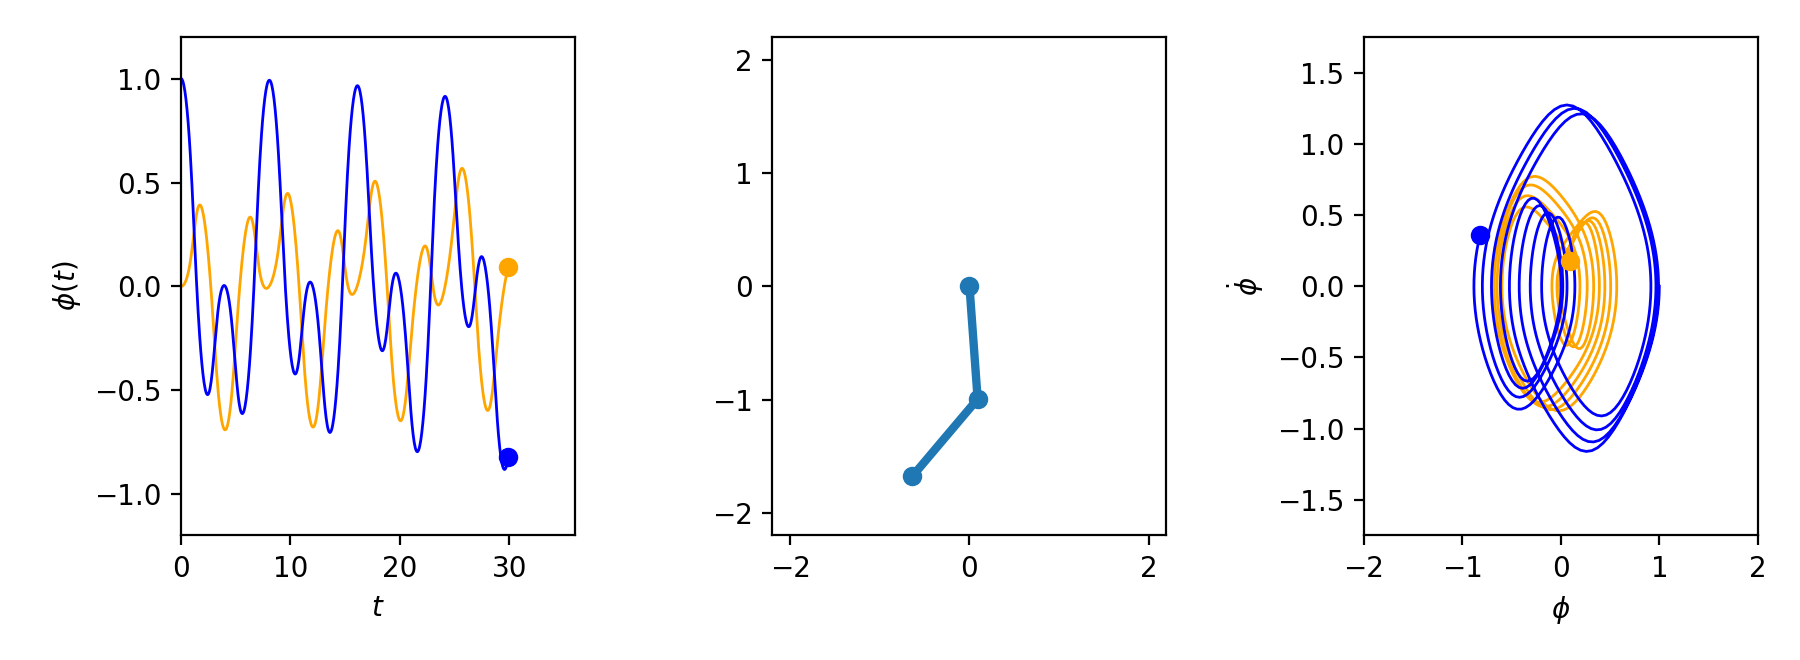

In [13]:
plot_start = 0.   # time to begin plotting
plot_end = 30.    # time to end plotting
pendulum_anim.plot_init()

# Start the animation (adjust skip and interval for a smooth plot at a 
#  useful speed)
skip = 5        # skip between time points (in units of delta_t) 
interval = 1.  # time between frames in milliseconds
pendulum_anim.start_Animation(plot_start, plot_end, skip, interval)